<a href="https://colab.research.google.com/github/326eunjin/ai-team_project/blob/main/6_2_4_37_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy as sp
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential,clone_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical,plot_model

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Preprocess the data
#y_train y_test 원래의 클래스의 레이블 정보 보존을 위해 따로 저장
x_test_origin = x_test
y_test_origin = y_test
x_train = x_train.astype('float32') / 255.0 #정규화
y_train = to_categorical(y_train) #one-hot encoding
x_test = x_test.astype('float32') / 255.0 #정규화
y_test = to_categorical(y_test) #one-hot encoding 

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# #original model Test Accuracy:  0.7023000121116638
# model = tf.keras.models.Sequential([
#     Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Conv2D(64, 3, activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])
#layer 0.7267000079154968 0.7376999855041504

model = tf.keras.models.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Dropout(0.25),
    Conv2D(256, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Dropout(0.25),
    Conv2D(512, 3, activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
    Dropout(0.25),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# #channel Test Accuracy:  0.7063999772071838
# model = tf.keras.models.Sequential([
#     Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Conv2D(256, 3, activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])
# #dense 늘리기 Test Accuracy:  0.7124000191688538
# model = tf.keras.models.Sequential([
#     Conv2D(64, 3, activation='relu', input_shape=(32, 32, 3), padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Conv2D(256, 3, activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'),
#     Flatten(),
#     Dense(1024, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(10, activation='softmax')
# ])

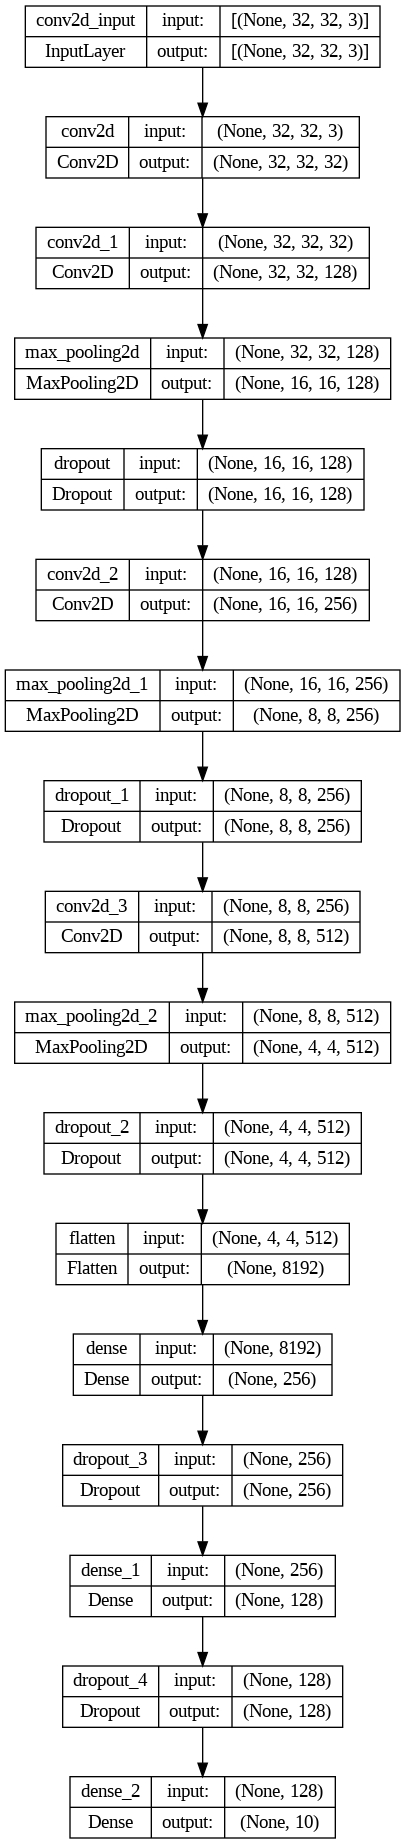

In [4]:
# model 시각화
plot_model(model, show_shapes=True)

In [5]:
batch_size=64
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
log_dir = './logs/tensorflow'
tensorboard_cb=keras.callbacks.TensorBoard(log_dir)

In [7]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=30, callbacks=[tensorboard_cb])
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest Accuracy: ',test_acc)
print('Test Loss: ',test_loss)

Epoch 1/30
782/782 [==============================] - 27s 19ms/step - loss: 1.7427 - accuracy: 0.3457
Epoch 2/30
782/782 [==============================] - 15s 19ms/step - loss: 1.2341 - accuracy: 0.5631
Epoch 3/30
782/782 [==============================] - 15s 19ms/step - loss: 1.0373 - accuracy: 0.6443
Epoch 4/30
782/782 [==============================] - 15s 19ms/step - loss: 0.9206 - accuracy: 0.6885
Epoch 5/30
782/782 [==============================] - 16s 21ms/step - loss: 0.8461 - accuracy: 0.7123
Epoch 6/30
782/782 [==============================] - 15s 19ms/step - loss: 0.7911 - accuracy: 0.7334
Epoch 7/30
782/782 [==============================] - 15s 20ms/step - loss: 0.7425 - accuracy: 0.7515
Epoch 8/30
782/782 [==============================] - 15s 19ms/step - loss: 0.7016 - accuracy: 0.7654
Epoch 9/30
782/782 [==============================] - 15s 19ms/step - loss: 0.6811 - accuracy: 0.7712
Epoch 10/30
782/782 [==============================] - 15s 19ms/step - loss: 0.644

In [8]:
# Apply PCA for dimensionality reduction of intermediate features
pca = PCA(n_components=3)

In [9]:
## Visualization of intermediate model 1 evaluation

# Apply PCA for dimensionality reduction of intermediate features 1
intermediate_model1 = Sequential(model.layers[:-5])
intermediate_features1 = intermediate_model1.predict(x_test)
reduced_intermediate_features1 = pca.fit_transform(intermediate_features1)

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_intermediate_features1[:, 0],
    y=reduced_intermediate_features1[:, 1],
    z=reduced_intermediate_features1[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten(),
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of intermediate model evaluation 1 - categorical crossentropy'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


313/313 [==============================] - 1s 2ms/step


In [10]:
## Visualization of intermediate model 1 evaluation

# Apply PCA for dimensionality reduction of intermediate features 1
intermediate_model1 = Sequential(model.layers[:-3])
intermediate_features1 = intermediate_model1.predict(x_test)
reduced_intermediate_features1 = pca.fit_transform(intermediate_features1)

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_intermediate_features1[:, 0],
    y=reduced_intermediate_features1[:, 1],
    z=reduced_intermediate_features1[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten(),
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of intermediate model evaluation 2 - categorical crossentropy'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


313/313 [==============================] - 1s 2ms/step


In [11]:
## Visualization of intermediate model evaluation

# Apply PCA for dimensionality reduction of intermediate features 2
intermediate_model2 = Sequential(model.layers[:-1])
intermediate_features2 = intermediate_model2.predict(x_test)
reduced_intermediate_features2 = pca.fit_transform(intermediate_features2)

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_intermediate_features2[:, 0],
    y=reduced_intermediate_features2[:, 1],
    z=reduced_intermediate_features2[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten(),
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of intermediate model evaluation 3 - categorical crossentropy'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


313/313 [==============================] - 1s 3ms/step


In [16]:
## Visualization of model evaluation

# Apply PCA for dimensionality reduction of test features
tmp_model = Sequential(model.layers[:])
test_features = tmp_model.predict(x_test)
reduced_test_features = pca.fit_transform(test_features)

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_test_features[:, 0],
    y=reduced_test_features[:, 1],
    z=reduced_test_features[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten(),
        colorscale='Viridis',
        size=2,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of model evaluation'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


313/313 [==============================] - 1s 2ms/step


In [13]:
def get_kmeans_loss():
  features = model.predict(x_train)
  # Apply K-means clustering for manifold space learning and design loss function
  kmeans = KMeans(n_clusters=10, random_state=0)
  kmeans.fit(features)
  kmeans_labels = kmeans.labels_

  # Calculate centroids manually
  centroids = []
  for i in range(kmeans.n_clusters):
      cluster_points = features[kmeans_labels == i]
      centroid = np.mean(cluster_points, axis=0)
      centroids.append(centroid)
  kmeans_loss = [0 for _ in range(10)]
  for i in range(len(y_train)):
    min = float('INF')
    for j in range(10):
      tmp = np.linalg.norm(y_train[i] - centroids[j], 2)
      min = tmp if min > tmp else min
    kmeans_loss[np.argmax(y_train[i])] += min
  return kmeans_loss

In [17]:
tf.config.run_functions_eagerly(True)

#kmeans_loss = tf.constant(kmeans_loss)
#Vol.1 Euclidean distance 지금 1등
def my_loss1(label, predict):
  np_label = np.array(label)
  loss_table = [kmeans_loss[np.argmax(np_label[i])] for i in range(len(np_label))]
  loss = tf.norm(label-predict,2) * loss_table
  return loss


#Vol.2 Cosine similarity 나가리
def my_loss2(label, predict):
  cosine_similarity = tf.tensordot(label, tf.transpose(predict),axes=1)/(tf.norm(label,2)*tf.norm(predict,2))
  loss = 1 - cosine_similarity
  return loss * 100

#Vol.3 Manhattan distance
# Test Accuracy:  0.4722000062465668 그닥 좋지 않음 ㅠ_ㅠ
def my_loss3(label, predict):
  loss = tf.norm(label - predict,1)
  return loss




In [18]:
batch_size=64
model.compile(optimizer='adam',
              loss=my_loss1,
              metrics=['accuracy'])

In [19]:
for _ in range(4):
  print(f"{_} times:")
  kmeans_loss = get_kmeans_loss()
  model.fit(x_train, y_train, batch_size=batch_size, epochs=1, callbacks=[tensorboard_cb])
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
  print('\nTest Accuracy: ',test_acc)
  print('Test Loss: ',test_loss)

0 times:


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



1563/1563 [==============================] - 18s 11ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



782/782 [==============================] - 59s 74ms/step - loss: 2000.5511 - accuracy: 0.8607
313/313 - 5s - loss: 1621.5941 - accuracy: 0.8159 - 5s/epoch - 16ms/step

Test Accuracy:  0.8159000277519226
Test Loss:  1621.5941162109375
1 times:
1563/1563 [==============================] - 16s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



782/782 [==============================] - 58s 74ms/step - loss: 1520.6102 - accuracy: 0.8669
313/313 - 6s - loss: 1242.3718 - accuracy: 0.8253 - 6s/epoch - 18ms/step

Test Accuracy:  0.8252999782562256
Test Loss:  1242.371826171875
2 times:
1563/1563 [==============================] - 16s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



782/782 [==============================] - 57s 73ms/step - loss: 1406.7837 - accuracy: 0.8674
313/313 - 5s - loss: 1171.1980 - accuracy: 0.8171 - 5s/epoch - 16ms/step

Test Accuracy:  0.8170999884605408
Test Loss:  1171.197998046875
3 times:
1563/1563 [==============================] - 16s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



782/782 [==============================] - 57s 73ms/step - loss: 1391.5190 - accuracy: 0.8660
313/313 - 6s - loss: 1102.0511 - accuracy: 0.8282 - 6s/epoch - 18ms/step

Test Accuracy:  0.8281999826431274
Test Loss:  1102.0511474609375


In [20]:
## Visualization of model evaluation

# Apply PCA for dimensionality reduction of test features
test_features = model.predict(x_test)
reduced_test_features = pca.fit_transform(test_features)

# Create a trace for the scatter plot
scatter_trace = go.Scatter3d(
    x=reduced_test_features[:, 0],
    y=reduced_test_features[:, 1],
    z=reduced_test_features[:, 2],
    mode='markers',
    marker=dict(
        color=y_test_origin.flatten()*10,
        colorscale='Viridis',
        size=3,
        opacity=0.8
    )
)

# Create the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Dimension 1'),
        yaxis=dict(title='Dimension 2'),
        zaxis=dict(title='Dimension 3')
    ),
    title='Visualization of model evaluation-my loss'
)

# Create the figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Resize the figure
fig.update_layout(width=800, height=800)

# Show the figure
fig.show()


313/313 [==============================] - 3s 10ms/step


In [21]:
cam_model = tf.keras.Model(model.input, outputs=(model.layers[4].output, model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       36992     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 256)       295168    
                                                             

In [22]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

(128, 10)

In [23]:
def show_cam(image_value, features, results, label):
    '''
    Displays the class activation map of an image
 
    Args:
        image_value (tensor) -- preprocessed input image with size 32 x 32
        features (array) -- features of the image, shape (1, 8, 8, 512)
        results (array) -- output of the sigmoid layer
    '''
    features_for_img = features
    prediction = results
 
    class_activation_weigths = gap_weights[:,label]
    class_activation_features = sp.ndimage.zoom(features_for_img, (32/8, 32/8, 1), order=2)
    cam_output = np.dot(class_activation_features, class_activation_weigths)
    cam_output = tf.reshape(cam_output, (32,32))
 
    # visualize the results
    print(f'softmax output: {results}')
    category = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    print(f"prediction: {category[tf.argmax(prediction)]}")
    plt.figure(figsize=(8,8))
    plt.imshow(cam_output, cmap='jet', alpha=0.5)
    plt.imshow(tf.squeeze(image_value), alpha=0.5)
    plt.show()
  
show_cam(x_test_origin, x_test, model.predict(x_test), y_test_origin)

  7/313 [..............................] - ETA: 2s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



313/313 [==============================] - 3s 10ms/step


RuntimeError: ignored